In [3]:
import dask.array as da

In [4]:
def zscore(x):
    return (x - np.mean(x)) / np.std(x)

In [5]:
def experiment(chunks=(2000, 2000)):
    x = da.random.random((8000, 8000), chunks=chunks)
    return zscore(x)

In [6]:
import dask
import dask.array as da
import numpy as np
import pandas as pd
import time

SCHEDULER = "threads"   # or "threads"

results = []

for p in range(1, 5):
    with dask.config.set(
        scheduler=SCHEDULER,
        num_workers=p
    ):
        t_ini = time.perf_counter()
        array = experiment()
        array.compute()
        t_total = time.perf_counter() - t_ini

    results.append({"p": p, "t_total": t_total})


In [7]:
df = pd.DataFrame(results)
print(df)

   p   t_total
0  1  1.156583
1  2  0.722724
2  3  0.662075
3  4  0.712457


In [8]:
def strong_scaling(t1, tp):
    return t1 / tp

def efficiency(t1, tp, p):
    return strong_scaling(t1, tp) / p

Text(0.5, 1.0, 'Total Time vs Number of Workers')

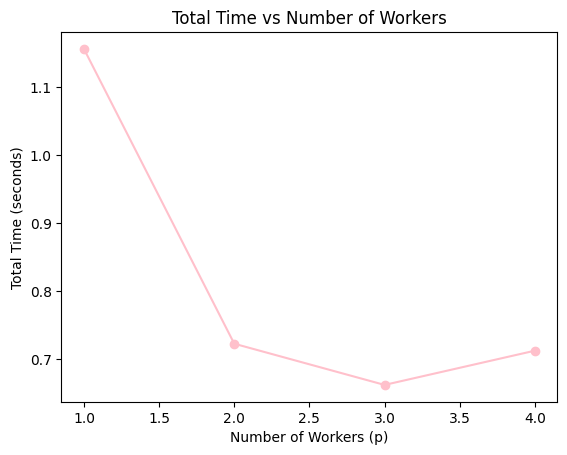

In [9]:
import matplotlib.pyplot as plt

plt.plot(df['p'], df['t_total'], marker='o', color='pink')
plt.xlabel('Number of Workers (p)')
plt.ylabel('Total Time (seconds)')
plt.savefig("totaltime.png", dpi=300, bbox_inches="tight")
plt.title('Total Time vs Number of Workers')

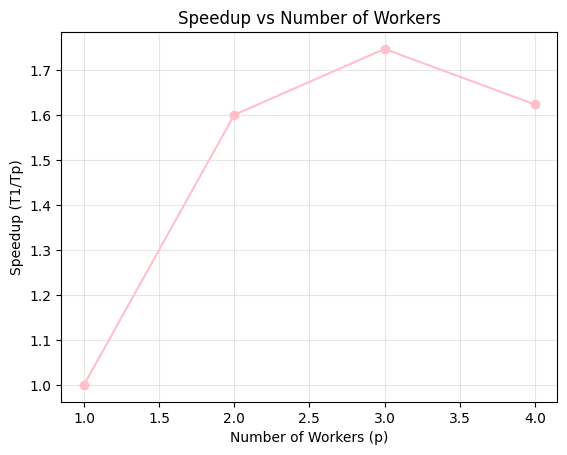

In [10]:
plt.plot(df['p'], strong_scaling(df['t_total'][0], df['t_total']), marker='o', color='pink')
plt.xlabel('Number of Workers (p)')
plt.ylabel('Speedup (T1/Tp)')
plt.title('Speedup vs Number of Workers')
plt.grid(alpha=0.3)
plt.savefig("speedup_strong.png", dpi=300, bbox_inches="tight")

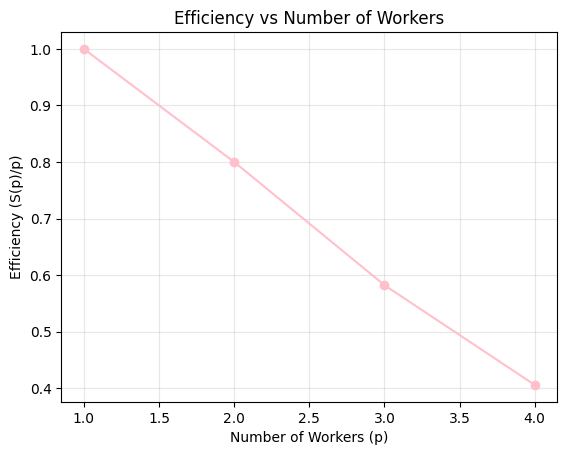

In [11]:
plt.plot(df['p'], efficiency(df['t_total'][0], df['t_total'], df['p']),marker='o', color='pink')
plt.xlabel('Number of Workers (p)')
plt.ylabel('Efficiency (S(p)/p)')
plt.title('Efficiency vs Number of Workers')
plt.grid(alpha=0.3)
plt.savefig("efficiency_strong.png", dpi=300, bbox_inches="tight")

   p      n   t_total
0  1   6000  0.492099
1  2   8485  0.799594
2  3  10392  1.078984
3  4  12000  1.444350


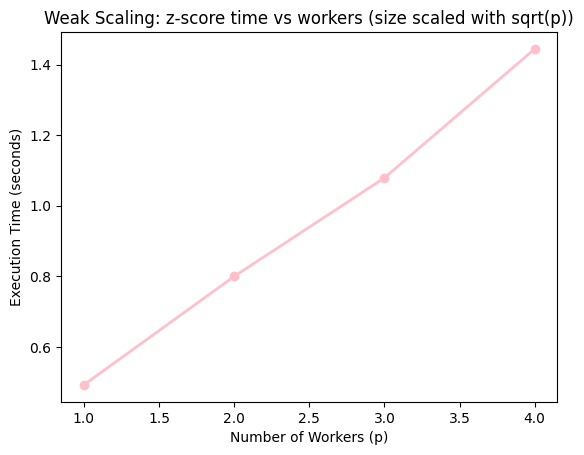

In [12]:
import dask
import dask.array as da
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

SCHEDULER = "threads"

def zscore(x):
    return (x - x.mean()) / x.std()

N1 = 6000              # <-- CHANGE THIS (try 6000 if still slow)
chunks = (4000, 4000)  # <-- fewer tasks = faster on threads

weak_results = []

for p in range(1, 5):
    n = int(N1 * np.sqrt(p))   # weak scaling rule

    with dask.config.set(scheduler=SCHEDULER, num_workers=p):
        t0 = time.perf_counter()

        x = da.random.random((n, n), chunks=chunks).astype("float32")
        z = zscore(x)
        z.compute()

        t_total = time.perf_counter() - t0

    weak_results.append({"p": p, "n": n, "t_total": t_total})

df_weak = pd.DataFrame(weak_results)
print(df_weak)

plt.figure()
plt.plot(df_weak["p"], df_weak["t_total"], marker="o", color="pink", linewidth=2)
plt.xlabel("Number of Workers (p)")
plt.ylabel("Execution Time (seconds)")
plt.title("Weak Scaling: z-score time vs workers (size scaled with sqrt(p))")
#plt.grid(alpha=0.3)
plt.savefig("weak_scaling.png", dpi=300, bbox_inches="tight")
plt.show()
